# Time Series Forecasting with Prophet in Python

## Prophet

The Prophet library is designed to make forecasts on univariate time series datasets.

In [1]:
from fbprophet import Prophet

## Car Sales Dataset

We will use a monthly car sales dataset. It is a standard univariate time series dataset that contains both a trend and seasonality.

In [2]:
import pandas as pd

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

print(df.shape)
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


We will plot the dataset to see if there is a trend, seasonal cycle, or outliers.

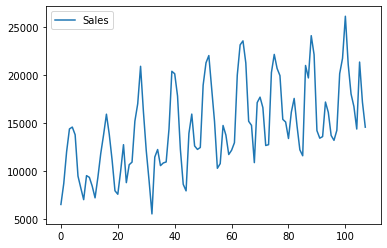

In [3]:
import matplotlib.pyplot as plt

df.plot()
plt.show()

We can clearly see a trend in sales over time, as well as seasonal trends among the months.

## Forecasting

### Fit Prophet model

The Prophet() object takes arguments to configure the type of model you want, such as type of growth, seasonality, and more. By default, the model tries to figure all of this out automatically.

In order to fit the model, the input dataframe must have a specific format: 1. The first column must have the name "ds" and contain the datetimes. 2. The second column must be named "y" and contain the observations.

In [4]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### In-sample forecast

In-sample forecasting is forecasting on a sample of the training set. The accuracy of this forecast can give us insight into how well the model learned the patterns in the data.

For our forecast dataframe, we will loop over the last 12 months of the training data, and create a string for each month. Then, we will convert this list of dates into a dataframe and convert the string objects into datetime objects.

In [8]:
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

The result of the predict() function is a dataframe with many columns. We are only interested in the forecast datetime (ds), the forecasted value (yhat), and the lower and upper bounds that provide the uncertainty of the forecast (yhat_lower and yhat_upper).

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12848.874953  15991.400350
1 1968-02-01  14905.955964  13325.455323  16457.713777
2 1968-03-01  20842.150502  19253.733812  22417.269955
3 1968-04-01  22870.095215  21357.532916  24417.555889
4 1968-05-01  24176.211162  22542.713093  25682.962151


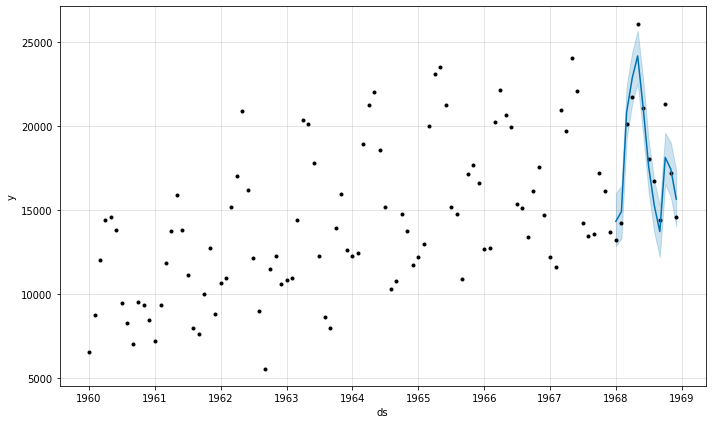

In [10]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
plt.show()

### Out-of-sample forecast

An out-of-sample forecast makes a prediction based on data outside of the training set. We can acheive this by specifiying the forecast period to begin at, and go beyond, the end of the training data.

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13836.233091  16991.134445
1 1969-02-01  16142.271673  14521.318395  17767.003447
2 1969-03-01  21351.832640  19683.515889  22879.685677
3 1969-04-01  23477.889811  21875.993560  25038.368504
4 1969-05-01  24988.440907  23320.202888  26629.697314


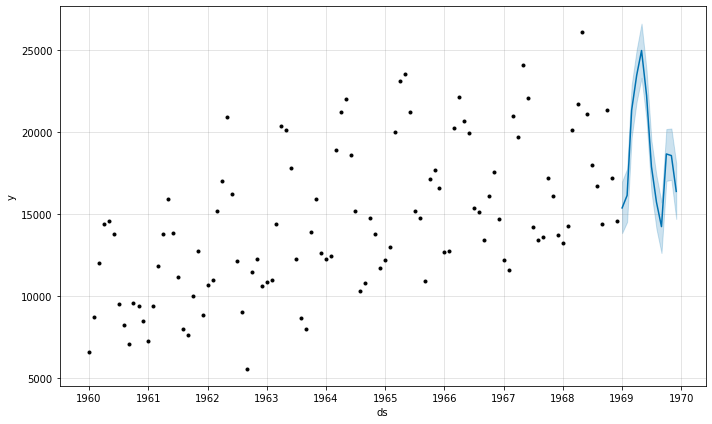

In [11]:
future = list()
for i in range(1, 13):
	  date = '1969-%02d' % i
	  future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
plt.show()

## Evaluate the model

We will evaluate the model on the last 12 months of the data, which will be hidden from it during training. We will use the mean absolute error as our scoring metric.

In [12]:
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


MAE: 1369.485


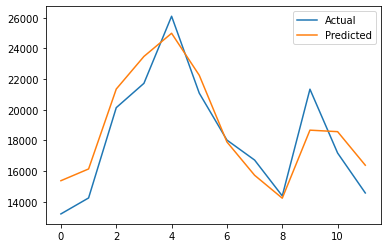

In [17]:
import sklearn as sk

y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = sk.metrics.mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()